---
## Lead Dell Fortaleza - Curso de Machine Learning 🤖️
### Estudo sobre o <i>Support Vector Machines</i>  (SVM) para previsão de chuva na Austrália

* Neste notebook iremos aplicar os conhecimentos aprendidos durante o curso de Machine Learning da Lead Dell Fortaleza, utilizando o algoritmo SVM para realizar a predição sobre o conjunto de  dados "Rain in Australia", disponível em: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. O objetivo é predizer se irá chover amanhã na Austrália, levando em conta diversas características do dia atual, como: localização, umidade do ar, pressão, entre outros. 

Por: Pedro Florencio de Almeida Neto

---

### <b> Passo 1: Análise Exploratória dos Dados 🔎️</b>
Esta etapa consiste em analisar e entender o dataset, buscando uma compreensão do problema proposto. Será feita a visualização de questões interessantes que surgirem bem como uma análise dos parâmetros.
* Importação das bibliotecas necessárias
* Identificação dos dados ausentes
* Análise dos dados através de gráficos e tabelas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


O conjunto de dados contém 145460 observações diárias do tempo de diferentes localizações da Austrália, de 2008 a 2017. A variável dependente (Y) será o atributo categórico RainTomorrow, isto é, a coluna 22 do dataset.

* Existem valores ausentes no dataset? Qual a porcentagem por coluna?

In [6]:
# Quantidade de valores ausentes
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
# Porcentagem de valores ausentes
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

* Quais as localidades e respectivas quantidades de observações neste dataset?

In [8]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Darwin              3193
Perth               3193
Hobart              3193
Adelaide            3193
Melbourne           3193
Albury              3040
MountGinini         3040
Bendigo             3040
Cairns              3040
Wollongong          3040
GoldCoast           3040
Launceston          3040
AliceSprings        3040
MountGambier        3040
Ballarat            3040
Albany              3040
Townsville          3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Nuriootpa           3009
Richmond            3009
Watsonia            3009
WaggaWagga          3009
Williamtown         3009
MelbourneAirport    3009
Mildura             3009
PerthAirport        3009
Portland            3009
PearceRAAF          3009
BadgerysCreek       3009
Dartmoor            3009
NorfolkIsland       3009
Sale                3009
Witchcliffe         3009
SydneyAirport       3009
Cobar               3009


* Quais os 10 locais que mais choveram?

In [9]:
df2 = df[['Location','RainTomorrow']].dropna()
df2

,Location,RainTomorrow
0,Albury,No
1,Albury,No
2,Albury,No
3,Albury,No
4,Albury,No
...,...,...
145454,Uluru,No
145455,Uluru,No
145456,Uluru,No
145457,Uluru,No


In [10]:
df3 = pd.get_dummies(df2['RainTomorrow']) 
df2 = pd.concat([df2, df3], axis=1, join="inner")
df2

,Location,RainTomorrow,No,Yes
0,Albury,No,1,0
1,Albury,No,1,0
2,Albury,No,1,0
3,Albury,No,1,0
4,Albury,No,1,0
...,...,...,...,...
145454,Uluru,No,1,0
145455,Uluru,No,1,0
145456,Uluru,No,1,0
145457,Uluru,No,1,0


In [11]:
locais_que_mais_choveram = df2.groupby(by='Location').sum()['Yes'].sort_values(ascending=False).head(10)
locais_que_mais_choveram

Location
Portland         1095.0
Cairns            950.0
Walpole           949.0
Dartmoor          922.0
MountGambier      920.0
NorfolkIsland     919.0
Albany            902.0
Witchcliffe       879.0
CoffsHarbour      869.0
Sydney            865.0
Name: Yes, dtype: float64

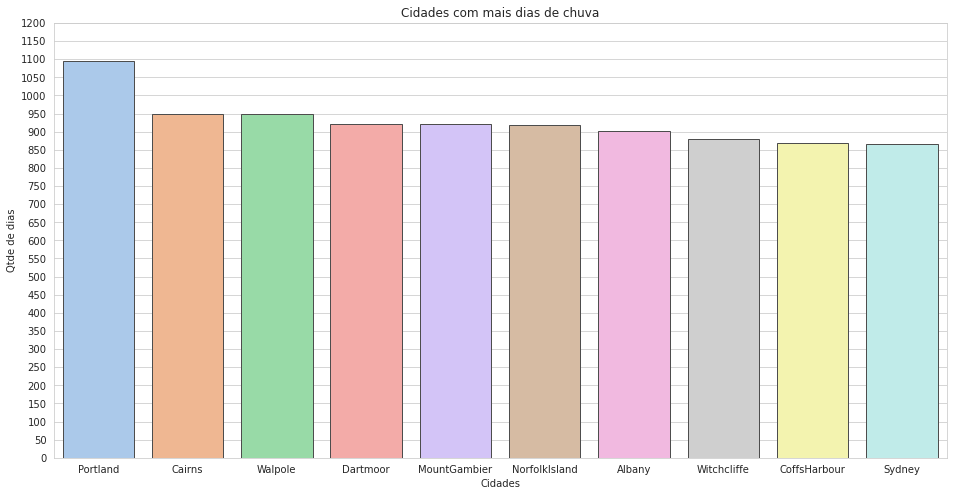

In [12]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.barplot(x=locais_que_mais_choveram.index,y=locais_que_mais_choveram.values,palette='pastel',edgecolor='0.3')
plt.yticks(ticks=np.arange(0,1201,50))
plt.title('Cidades com mais dias de chuva')
plt.xlabel('Cidades')
plt.ylabel('Qtde de dias')
plt.show()

Verificando correlação entre as features

In [13]:
corr = df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<Figure size 1296x1296 with 0 Axes>

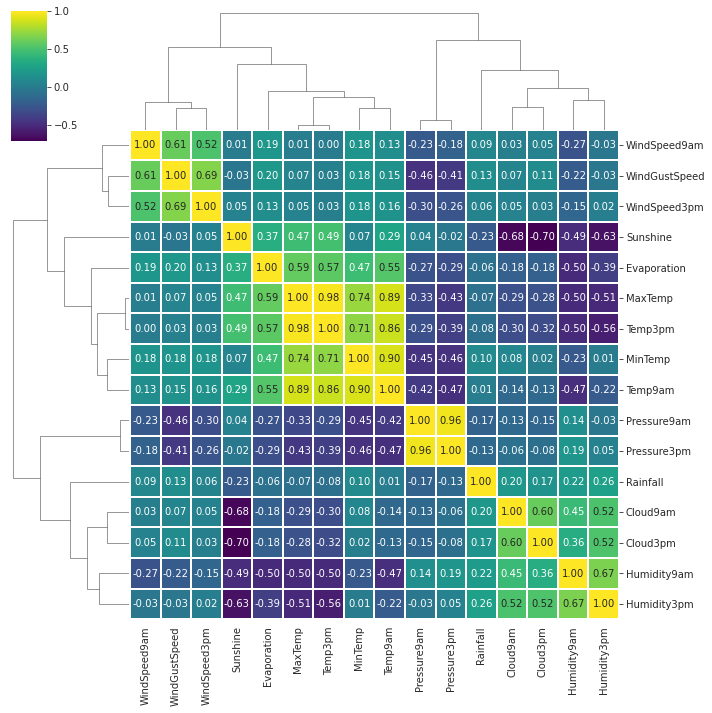

In [14]:
plt.figure(figsize=(18,18))
sns.clustermap(df.corr(),cmap='viridis',annot=True,linewidths=1,fmt='.2f')
plt.show()

---
### <b> Passo 2: Pré-Processamento dos Dados 📝 </b>
Esta etapa consiste em:
* Fazer o tratamento dos dados, removendo ou injetando dados que estavam faltantes;
* Selecionar as colunas que são importantes para o nosso modelo;
* Aplicação de escalonamento e remoção de outliers, se necessário;
* Feature engineering com os dados categóricos;
* Definição da variável dependente e variáveis independentes;
* Separação dos dados em treino e teste.

Relembrando a porcentagem de valores ausentes

In [15]:
# Porcentagem de valores ausentes
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Removendo as linhas com valores ausentes das features Rain Tomorrow e Rain Today, tendo em vista que são extremamente importantes para o modelo e não pode haver inconsistência nelas

In [16]:
df.dropna(axis = 0,subset=['RainTomorrow','RainToday'],inplace=True)

Removendo a coluna Date

In [17]:
df.drop(["Date"],axis=1,inplace =True)

In [18]:
df.isnull().sum()/len(df)*100

Location          0.000000
MinTemp           0.332417
MaxTemp           0.218060
Rainfall          0.000000
Evaporation      42.400222
Sunshine         47.451114
WindGustDir       6.508413
WindGustSpeed     6.467216
WindDir9am        6.861429
WindDir3pm        2.606775
WindSpeed9am      0.749359
WindSpeed3pm      1.797751
Humidity9am       1.077514
Humidity3pm       2.486735
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Temp9am           0.465952
Temp3pm           1.863808
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

Removendo os atributos categóricos temporariamente, para efetuar a substituição dos dados faltantes nos atributos numéricos com a sua respectiva média

In [19]:
colunasCompletar = df.drop(["RainToday","RainTomorrow","WindDir9am","WindDir3pm","WindGustDir","Location"],axis=1)
colunasCompletar

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


In [20]:
for col in colunasCompletar:
        df[col] = df[col].fillna(df[col].mean())
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


Removendo dados faltantes dos atributos categóricos

In [21]:
df = df.dropna(subset= ["WindDir9am","WindGustDir","WindDir3pm"],how="any")
# Verificando se ainda há dados faltantes
df.isnull().sum()/len(df)*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Codificando os atributos categóricos

In [22]:
from sklearn.preprocessing import LabelEncoder

Categoricas = ['WindDir3pm','RainToday','WindDir9am','WindGustDir','Location']

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for col in Categoricas:
    lbl.fit(df[col])
    df[col] = lbl.transform(df[col].values.reshape(-1,))
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.472516,7.63054,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,No
1,1,7.4,25.1,0.0,5.472516,7.63054,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,No
2,1,12.9,25.7,0.0,5.472516,7.63054,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,No
3,1,9.2,28.0,0.0,5.472516,7.63054,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,No
4,1,17.5,32.3,1.0,5.472516,7.63054,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int64  
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int64  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int64  
 9   WindDir3pm     123710 non-null  int64  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

Definindo a variável dependente e as variáveis independentes

In [24]:
X = df.drop('RainTomorrow',axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.9,0.6,5.472516,7.63054,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,1,7.4,25.1,0.0,5.472516,7.63054,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,1,12.9,25.7,0.0,5.472516,7.63054,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,1,9.2,28.0,0.0,5.472516,7.63054,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,1,17.5,32.3,1.0,5.472516,7.63054,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,5.472516,7.63054,0,31.0,2,0,...,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0
145455,39,2.8,23.4,0.0,5.472516,7.63054,0,31.0,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0
145456,39,3.6,25.3,0.0,5.472516,7.63054,6,22.0,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0
145457,39,5.4,26.9,0.0,5.472516,7.63054,3,37.0,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0


In [25]:
#Substituindo Yes e No por 1 e 0, respectivamente
y = df['RainTomorrow'].map({'Yes':1,'No':0})
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 123710, dtype: int64

Definindo conjuntos de treino e teste

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

Escalonando as features

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.05579257, -1.75519959, -2.53060497, ..., -2.2720237 ,
        -2.4645295 , -0.53961597],
       [-1.45075169, -0.9556728 , -0.77050729, ..., -0.39313816,
        -0.75310563, -0.53961597],
       [ 0.31130193,  0.11036291,  1.71026032, ...,  1.608953  ,
         1.84255391, -0.53961597],
       ...,
       [-1.08365719,  0.32984085,  0.28277952, ...,  0.14588638,
         0.38784362, -0.53961597],
       [ 1.26574765, -0.9713498 , -1.13084225, ..., -0.77815569,
        -0.99555734,  1.85316977],
       [ 1.33916655,  0.81582772,  1.66868321, ...,  1.14693196,
         1.40043608, -0.53961597]])

--- 
### <b> Passo 3: Escolha e treinamento do modelo de Machine Learning 🤖️ </b>

Esta etapa consiste em escolher o modelo (que será o SVM, utilizando diferentes kerneis) e realizar o treinamento com o conjunto de treino.

Kernel Linear

In [28]:
from sklearn.svm import LinearSVC
svm = LinearSVC(loss='hinge',max_iter=5000,C=10)

In [29]:
svm.fit(X_train,y_train)

/home/pedroflorencio/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10, loss='hinge', max_iter=5000)

Kernel Polinomial

In [30]:
from sklearn.svm import SVC
svm2 = SVC(kernel='poly',degree=2)
svm2.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

Kernel RBF

In [31]:
# Funciona melhor para uma gama maior de dados
svm3 = SVC(kernel='rbf')
svm3.fit(X_train,y_train)

SVC()

---
### <b>Passo 4: Previsão e avaliação do modelo 🔮️ </b>

Kernel Linear

In [32]:
svm.score(X_test,y_test)

0.8381078634247284

Kernel Polinomial

In [33]:
svm2.score(X_test,y_test)

0.8426668391101914

Kernel RBF

In [34]:
svm3.score(X_test,y_test)

0.8423435075012933

Melhorias necessárias:
* Comparar com outros modelos de classificação e aplicar cross-validation;
* Aplicar GridSearch nos hiperparâmetros;
* Visualizar matriz de confusão, curvas ROC e AOC nos modelos.

Obrigado!

---